In [2]:
import sys 
sys.path.append("../..")

import joblib
from data.data_loader import scaler
gmm = joblib.load(open("../../synthetic_anomalies/gmm/gmm.joblib", "rb"))

import scienceplots
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import pandas as pd

plt.style.use("science")

import numpy as np

In [12]:
encoded = np.load("../data/encoded_objs.npy")
X = np.load("../data/normalised_objs.npy")
decoded = np.load("../data/decoded_objs.npy")

data = pd.read_csv("../../dp03/dp03_objects.csv")
clean_objs = data.dropna()
clean_objs = clean_objs.drop(columns=["ssObjectId", "fullDesignation", "q2", "e2", "Unnamed: 0"])

clean_objs["i-z"] = clean_objs["i_H"] - clean_objs["z_H"]
clean_objs["g-r"] = clean_objs["g_H"] - clean_objs["r_H"]
clean_objs["r-i"] = clean_objs["r_H"] - clean_objs["i_H"]


clean_objs["a*"] = .89*(clean_objs["g-r"]) + .45*(clean_objs["r-i"]) -.57

clean_objs["a"] = clean_objs["q"]/(1-clean_objs["e"])

clean_objs["Q"] = clean_objs["a"]*(1 + clean_objs["e"])
clean_objs["T_jup"] = (5.204/clean_objs["a"]) + 2*np.cos((clean_objs["incl"]/180)*np.pi)*np.sqrt((clean_objs["a"]/5.204)*(1 - clean_objs["e"]**2))


clean_objs["sini"] = np.sin((np.pi*clean_objs["incl"])/180)
subspace = ["a*", "i-z", "a", "sini", "e"]

clean_objs["scores"] = gmm.score_samples(
    scaler.transform(clean_objs[subspace].to_numpy())
)
clean_objs["recon_losses"] = np.sum((X - decoded)**2, axis=1)

clean_objs["index"] = clean_objs.index 

clean_objs = clean_objs.reset_index(drop=True)

del data
del decoded
del X
del encoded

In [13]:
trojan_test = clean_objs[(clean_objs["a"] > 5.16) & (clean_objs["a"] < 5.24)]

trojan_test["norm_scores"] = (trojan_test["scores"] - trojan_test["scores"].max())
trojan_test["norm_scores"] /= trojan_test["norm_scores"].min()
trojan_test["norm_rl"] =  trojan_test["recon_losses"] / trojan_test["recon_losses"].max()
trojan_test["recon_dist"] = np.sqrt(trojan_test["norm_rl"]**2 + trojan_test["norm_scores"]**2)

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_18475/2758718565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trojan_test["norm_scores"] = (trojan_test["scores"] - trojan_test["scores"].max())
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_18475/2758718565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trojan_test["norm_scores"] /= trojan_test["norm_scores"].min()
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_18475/2758718565.py:5: SettingWithCopyWarning: 
A v

In [14]:
trojan_test.describe()

flags        g_Chi2         g_G12      g_G12Err           g_H  \
count  36499.000000  36499.000000  36499.000000  36499.000000  36499.000000   
mean      77.671114      3.097841      0.630484      0.301805     15.690594   
std      154.165101     19.781928      0.450008      0.789120      1.103641   
min       66.000000      0.056697     -3.040900      0.001903      8.841667   
25%       66.000000      0.948646      0.383234      0.122917     15.187943   
50%       66.000000      1.168102      0.608096      0.238062     16.023340   
75%       66.000000      1.510479      0.776893      0.385996     16.416035   
max     2114.000000    875.417240     37.333103    122.205640     20.096780   

             g_HErr        i_Chi2         i_G12      i_G12Err           i_H  \
count  36499.000000  36499.000000  36499.000000  36499.000000  36499.000000   
mean       0.057367      1.944271      0.635692      0.301704     15.102277   
std        0.057373      7.640656      0.597928      3.556770      1.100513   
min        0.000312      0.066059     -7.580500      0.001914      8.262268   
25%        0.024032      0.958700      0.434766      0.106851     14.606724   
50%        0.047549      1.106342      0.618851      0.212173     15.438224   
75%        0.075831      1.310443      0.757552      0.356457     15.826220   
max        3.124294    319.134580     81.768110    666.561460     20.324804   

       ...             a             Q         T_jup          sini  \
count  ...  36499.000000  36499.000000  36499.000000  36499.000000   
mean   ...      5.199692      5.623969      2.901868      0.258344   
std    ...      0.022109      0.225886      0.100821      0.136610   
min    ...      5.160003      5.168638      2.032493      0.000476   
25%    ...      5.181158      5.453012      2.875123      0.160036   
50%    ...      5.199595      5.593983      2.931817      0.239972   
75%    ...      5.217953      5.766430      2.966559      0.333560   
max    ...      5.239998      7.695972      2.999828      0.856586   

             scores  recon_losses         index   norm_scores       norm_rl  \
count  36499.000000  36499.000000  3.649900e+04  36499.000000  36499.000000   
mean       4.259312      0.000304  2.222838e+06      0.118263      0.010301   
std        6.184345      0.000723  1.288272e+06      0.106678      0.024486   
min      -46.856929      0.000032  2.000000e+00     -0.000000      0.001092   
25%        3.407531      0.000154  1.111902e+06      0.057706      0.005226   
50%        5.760012      0.000206  2.225387e+06      0.092376      0.006981   
75%        7.769903      0.000280  3.351328e+06      0.132956      0.009497   
max       11.115257      0.029529  4.442190e+06      1.000000      1.000000   

         recon_dist  
count  36499.000000  
mean       0.120137  
std        0.107885  
min        0.003346  
25%        0.059065  
50%        0.093239  
75%        0.134340  
max        1.369633  

[8 rows x 42 columns]

In [299]:
pd.set_option("display.max_columns", None)
trojan_test.sort_values(by="recon_dist", ascending=False).head(20)

flags      g_Chi2      g_G12    g_G12Err        g_H    g_HErr  \
1493921     66    2.349890   0.841240    4.693747  18.512781  0.944864   
2787870     66    0.935575  37.333103  122.205640  20.096780  3.124294   
311613      66    1.297527   0.200000    1.895111  17.791216  0.426232   
684306      66  327.834230   0.730520    0.003613   9.275009  0.000642   
1926387     66  666.561600   0.671344    0.002368   8.841667  0.000313   
2224650     66   41.323470   0.720422    0.002792   9.196053  0.000427   
2890617     66   77.273850   0.727062    0.007354  10.795829  0.001374   
488368      66  767.824460   0.252775    0.006354   9.776393  0.001313   
1280284     66  549.144800   0.670750    0.004545   9.254297  0.000735   
2817476     66  185.312400   0.874199    0.004509   9.675700  0.000790   
43952       66    0.957719   0.120974    0.295451  16.700304  0.166101   
3196563     66    1.479711   1.617997    0.670466  16.283218  0.091032   
116598      66    0.807749   1.008070    0.908833  17.081524  0.164216   
2430640   2114    0.698283   1.594041    5.242490  18.055410  0.867706   
1058274     66    1.349525   1.264446    0.536915  16.617416  0.082923   
1292474     66    1.092945   0.691317    0.519271  16.792326  0.103993   
126786      66    0.848160  -0.003545    0.313894  17.509533  0.083529   
3449768   2114    0.636342  18.046984   62.054718  18.845980  2.929684   
978909      66    1.318797  -0.013113    0.252335  16.723335  0.117013   
91680       66    0.957257   4.698411    1.760244  17.072224  0.184309   

             i_Chi2      i_G12    i_G12Err        i_H    i_HErr  i_Ndata  \
1493921    0.572874  15.065521   26.479301  19.139530  1.404525       16   
2787870    0.891090  11.374876   28.719730  18.477453  1.888796       34   
311613     0.874092  81.768110  666.561460  20.324804  8.366397       17   
684306    75.637990   0.756999    0.002765   8.692148  0.000522      105   
1926387    7.247641   0.669784    0.006070   8.262268  0.000989       35   
2224650   13.407865   0.647056    0.002266   8.596161  0.000331       86   
2890617   53.850697   0.646725    0.004586  10.193034  0.000833      131   
488368    20.968464   0.722663    0.005268   9.291109  0.001033       56   
1280284  120.153076   0.782184    0.003668   8.681853  0.000569       34   
2817476  113.898240   0.762578    0.003173   9.065223  0.000460      117   
43952      0.819532   1.047603    0.791539  16.220552  0.102318       37   
3196563    1.095707   0.456756    0.410676  15.514332  0.069765       45   
116598     0.681218  14.194704   10.459858  17.659150  0.587764       20   
2430640    0.972452   0.200005    3.206809  17.486084  0.507732        5   
1058274    1.097671   0.109088    0.152813  15.901657  0.076265       59   
1292474    1.133159   0.604154    0.627193  16.197880  0.128982       44   
126786     0.574960   0.200002    2.878112  16.912247  0.566806       34   
3449768    1.277632   2.116821    3.107299  17.109558  0.433625       14   
978909     0.946092   0.200002    1.066227  15.985890  0.246063       29   
91680      0.946013   0.200002    0.514958  15.837840  0.108231       31   

             r_Chi2      r_G12    r_G12Err        r_H    r_HErr     z_Chi2  \
1493921    0.884938  56.962830  389.713500  20.681880  6.831612   1.093335   
2787870    1.245990   0.200000    2.025361  17.344416  0.418191   0.858838   
311613     0.937061   0.200003    1.675325  17.247200  0.385040   0.771853   
684306   202.445560   0.788710    0.002367   8.812490  0.000433  30.004921   
1926387    6.931652   0.619970    0.002729   8.372315  0.000349   4.091128   
2224650   43.653850   0.707275    0.001953   8.720422  0.000282   4.515318   
2890617  109.289560   0.656817    0.003918  10.310885  0.000723  21.607004   
488368   129.227050   0.678272    0.003659   9.399730  0.000663   6.935894   
1280284  187.200700   0.781604    0.003049   8.799199  0.000454  17.698103   
2817476  151.309680   0.732757    0.002576   9.180672  0.000413  30.340601   

In [290]:
data.loc[trojan_test.sort_values(by="recon_dist", ascending=False).head(10).index, "fullDesignation"]

1493921    2011 St500JPna
2787870    2011 St500wBoa
311613     2011 St500uJga
684306     2011 St50000ra
1926387    2011 St50000ga
2224650    2011 St50000pa
2890617    2011 St50002da
488368       2011 1985 VO
1280284      2011 A908 FE
2817476    2011 St50000Fa
Name: fullDesignation, dtype: object

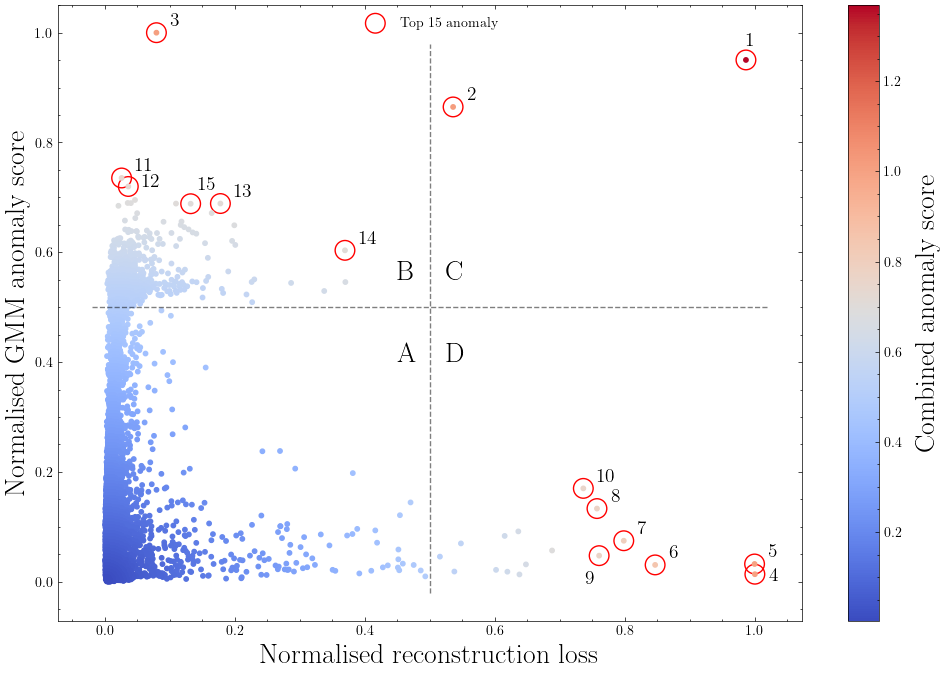

In [15]:
plt.figure(figsize=(12,8))

trojan_test = trojan_test.sort_values(by="recon_dist", ascending=False)

top_rl = trojan_test["norm_rl"]
top_scores = trojan_test["norm_scores"]

for idx, (x, y) in enumerate(zip(top_rl[:15], top_scores[:15])):
    if idx == 0:
        plt.scatter(
            [x],
            [y],
            facecolor="none",
            edgecolor="red",
            s=200,
            label="Top 15 anomaly",

        )
        
        plt.annotate(f'{str(idx + 1)}', (x,y), xytext=(0, 10), textcoords='offset points', fontsize=14)
    else:
        plt.scatter(
            [x],
            [y],
            facecolor="none",
            edgecolor="red",
            s=200,
        )

        if idx < 15:
            if idx == 3:
                plt.annotate(f'{str(idx + 1)}', (x, y), xytext=(10, -5), textcoords='offset points', fontsize=14)
            elif idx == 8:
                plt.annotate(f'{str(idx + 1)}', (x, y), xytext=(-10, -20), textcoords='offset points', fontsize=14)
            elif idx == 11:
                plt.annotate(f'{str(idx + 1)}', (x, y), xytext=(10, 0), textcoords='offset points', fontsize=14)
            elif idx == 14:
                plt.annotate(f'{str(idx + 1)}', (x, y), xytext=(5, 10), textcoords='offset points', fontsize=14)
            else:
                plt.annotate(f'{str(idx + 1)}', (x, y), xytext=(10, 5), textcoords='offset points', fontsize=14)
plt.scatter(
    top_rl,
    top_scores,
    s=10,
    c=trojan_test["recon_dist"],
    cmap="coolwarm"
)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Combined anomaly score', fontsize=20, labelpad=10)
plt.plot([.5,.5],[-.02, 0.98], linewidth=1, color='black', ls="--", alpha=.5)
plt.plot([-.02,1.02], [.5,.5], linewidth=1, color='black', ls="--", alpha=.5)

plt.annotate(f'A', (0.45, 0.40), fontsize=20)
plt.annotate(f'B', (0.45, 0.55), fontsize=20)
plt.annotate(f'C', (0.525, 0.55), fontsize=20)
plt.annotate(f'D', (0.525, 0.40), fontsize=20)

plt.xlabel("Normalised reconstruction loss", fontsize=20)
plt.ylabel("Normalised GMM anomaly score", fontsize=20)
plt.legend(loc="upper center")
plt.savefig("oc_anom_space.png", dpi=300)

In [26]:
# Quadrant percentages

#A
A = 100*len(trojan_test[(trojan_test["norm_scores"] < 0.5) & (trojan_test["norm_rl"] < 0.5)])/len(trojan_test)
print(f"A: {A} %")

#B
B = 100*len(trojan_test[(trojan_test["norm_scores"] > 0.5) &  (trojan_test["norm_rl"] < 0.5)])/len(trojan_test)
print(f"B: {B} %")

#C
C = 100*len(trojan_test[(trojan_test["norm_scores"] > 0.5) &  (trojan_test["norm_rl"] > 0.5)])/len(trojan_test)
print(f"C: {C} %")

#D 
D = 100*len(trojan_test[(trojan_test["norm_scores"] < 0.5) &  (trojan_test["norm_rl"] > 0.5)])/len(trojan_test)
print(f"D: {D} %")

A: 97.08485163977095 %
B: 2.8630921395106714 %
C: 0.005479602180881668 %
D: 0.04657661853749418 %


In [175]:
pd.merge(
    trojan_test.sort_values(by="recon_dist", ascending=False).head(20),
    pd.DataFrame(
        encoded[clean_objs[clean_objs["index"].isin(trojan_test.sort_values(by="recon_dist", ascending=False).head(20).index)].index, :],
        columns=[f"AE {i}" for i in range(1,7)],
        index=trojan_test.sort_values(by="recon_dist", ascending=False).head(20).index
    ),
    left_index=True,
    right_index=True
)

flags      g_Chi2      g_G12    g_G12Err        g_H    g_HErr  \
1493921     66    2.349890   0.841240    4.693747  18.512781  0.944864   
2787870     66    0.935575  37.333103  122.205640  20.096780  3.124294   
311613      66    1.297527   0.200000    1.895111  17.791216  0.426232   
684306      66  327.834230   0.730520    0.003613   9.275009  0.000642   
1926387     66  666.561600   0.671344    0.002368   8.841667  0.000313   
2224650     66   41.323470   0.720422    0.002792   9.196053  0.000427   
2890617     66   77.273850   0.727062    0.007354  10.795829  0.001374   
488368      66  767.824460   0.252775    0.006354   9.776393  0.001313   
1280284     66  549.144800   0.670750    0.004545   9.254297  0.000735   
2817476     66  185.312400   0.874199    0.004509   9.675700  0.000790   
43952       66    0.957719   0.120974    0.295451  16.700304  0.166101   
3196563     66    1.479711   1.617997    0.670466  16.283218  0.091032   
116598      66    0.807749   1.008070    0.908833  17.081524  0.164216   
2430640   2114    0.698283   1.594041    5.242490  18.055410  0.867706   
1058274     66    1.349525   1.264446    0.536915  16.617416  0.082923   
1292474     66    1.092945   0.691317    0.519271  16.792326  0.103993   
126786      66    0.848160  -0.003545    0.313894  17.509533  0.083529   
3449768   2114    0.636342  18.046984   62.054718  18.845980  2.929684   
978909      66    1.318797  -0.013113    0.252335  16.723335  0.117013   
91680       66    0.957257   4.698411    1.760244  17.072224  0.184309   

             i_Chi2      i_G12    i_G12Err        i_H    i_HErr  i_Ndata  \
1493921    0.572874  15.065521   26.479301  19.139530  1.404525       16   
2787870    0.891090  11.374876   28.719730  18.477453  1.888796       34   
311613     0.874092  81.768110  666.561460  20.324804  8.366397       17   
684306    75.637990   0.756999    0.002765   8.692148  0.000522      105   
1926387    7.247641   0.669784    0.006070   8.262268  0.000989       35   
2224650   13.407865   0.647056    0.002266   8.596161  0.000331       86   
2890617   53.850697   0.646725    0.004586  10.193034  0.000833      131   
488368    20.968464   0.722663    0.005268   9.291109  0.001033       56   
1280284  120.153076   0.782184    0.003668   8.681853  0.000569       34   
2817476  113.898240   0.762578    0.003173   9.065223  0.000460      117   
43952      0.819532   1.047603    0.791539  16.220552  0.102318       37   
3196563    1.095707   0.456756    0.410676  15.514332  0.069765       45   
116598     0.681218  14.194704   10.459858  17.659150  0.587764       20   
2430640    0.972452   0.200005    3.206809  17.486084  0.507732        5   
1058274    1.097671   0.109088    0.152813  15.901657  0.076265       59   
1292474    1.133159   0.604154    0.627193  16.197880  0.128982       44   
126786     0.574960   0.200002    2.878112  16.912247  0.566806       34   
3449768    1.277632   2.116821    3.107299  17.109558  0.433625       14   
978909     0.946092   0.200002    1.066227  15.985890  0.246063       29   
91680      0.946013   0.200002    0.514958  15.837840  0.108231       31   

             r_Chi2      r_G12    r_G12Err        r_H    r_HErr     z_Chi2  \
1493921    0.884938  56.962830  389.713500  20.681880  6.831612   1.093335   
2787870    1.245990   0.200000    2.025361  17.344416  0.418191   0.858838   
311613     0.937061   0.200003    1.675325  17.247200  0.385040   0.771853   
684306   202.445560   0.788710    0.002367   8.812490  0.000433  30.004921   
1926387    6.931652   0.619970    0.002729   8.372315  0.000349   4.091128   
2224650   43.653850   0.707275    0.001953   8.720422  0.000282   4.515318   
2890617  109.289560   0.656817    0.003918  10.310885  0.000723  21.607004   
488368   129.227050   0.678272    0.003659   9.399730  0.000663   6.935894   
1280284  187.200700   0.781604    0.003049   8.799199  0.000454  17.698103   
2817476  151.309680   0.732757    0.002576   9.180672  0.000413  30.340601   